<a href="https://colab.research.google.com/github/sabitendu/EDA-Capstone-Project-on-Play-Store-App-Review-Analysis/blob/main/playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Explore the playstore data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
%matplotlib inline

### Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
ps_data_path='/content/drive/MyDrive/Alma Better/Python For Data Science/Capstone_Project/Play Store Data.csv'
df_ps=pd.read_csv(ps_data_path)

### Dataset First View

In [4]:
# Dataset First Look
#let's watch the first 10 row
df_ps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
#let's look to the last 10 rows
df_ps.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
rows=df_ps.shape[0]
column=df_ps.shape[1]
print(f"no of rows is {rows} and no of columns is {column}")

no of rows is 10841 and no of columns is 13


### Dataset Information

In [8]:
# Dataset Info
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **From above we can observe two major facts and they are**


1.   **out of 13 columns 1 column is numerical rest are in categorical value**

2.   **There are few null data present in the dataset,we will inspect them later.** 







#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicate=df_ps[df_ps.duplicated(subset='App')]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [10]:
df_ps['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [11]:
df_ps.drop_duplicates(subset='App',inplace=True)
df_ps.shape

(9660, 13)

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df_ps.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

It's look like only 5 columns has  missing data and Rating column has most missing data and its around 15 percent,others have less than 1 percent missing data.

<AxesSubplot:>

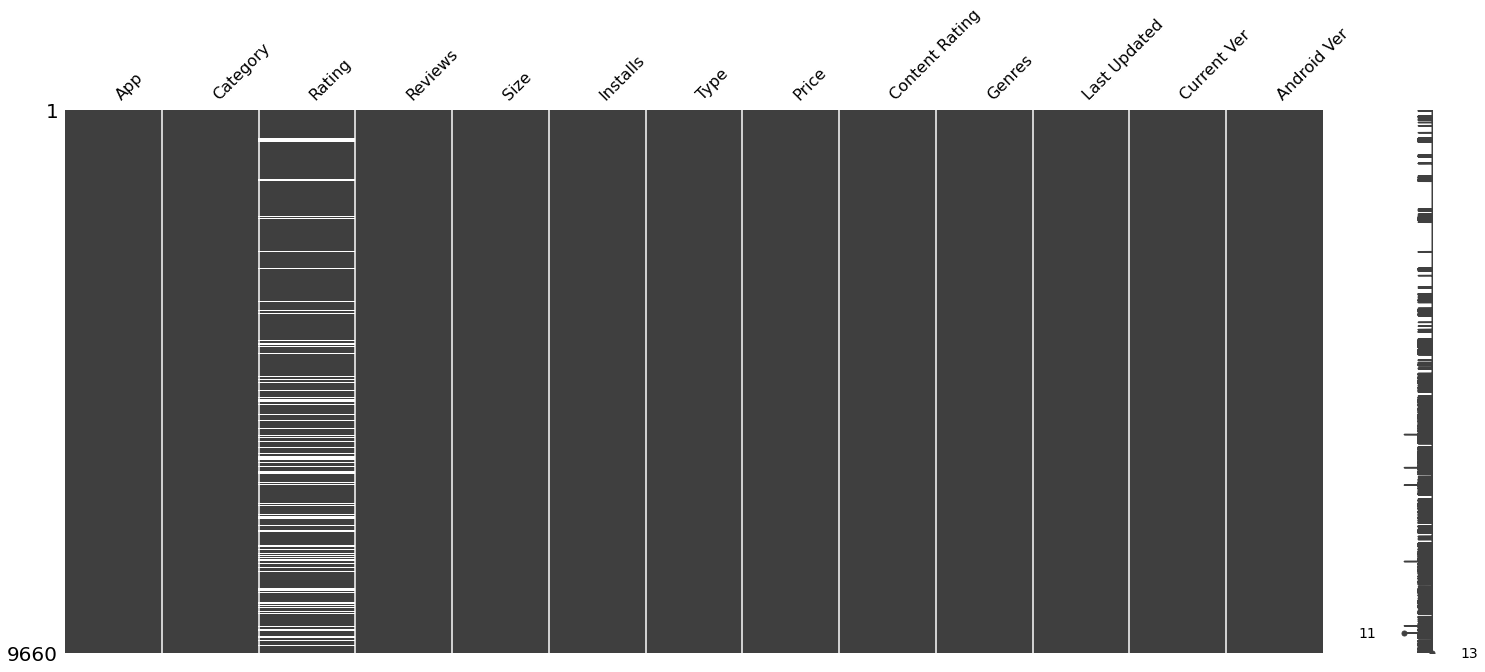

In [13]:
#@title
# Visualizing the missing values
msno.matrix(df_ps)

From the above matrix plot we can see that the missing value of Rating column are located all over the place,current_ver column's missing value located near the ending part of the column and other column's missing value are not observable respective of amount of the data.

### What did you know about your dataset?

**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:



*   **App** - It tells us about the name of the application.
*   **Category** - It gives the category to the app,like educational,sports,games etc.

*   **Rating** - It contains the average rating of the respective app received from its users.
*   **Reviews** - It shows us about the total number of users who have given a review for the application.

*   **Size** - It tells us about the size being occupied by the application on the mobile phone.

*  **Installs** - It tells us about the total number of installs/downloads for the application.
*   **Type** - It states whether an app is free to use or paid.

*  **Price** - It states the price payable to install the app. For free type apps, the price is zero.

*  **Content Rating** - It states whether or not an app is suitable for all age groups or not.

*   **Genres** - It tells us about the various other categories to which an application can belong.
*  **Last Updated** - It tells us about the when the application was updated.

*  **Current Ver** - It tells us about the current version of the application.

*  **Android Ver** - It tells us about the android version which can support the application on its platform.
























Answer Here

## ***2. Understanding Your Variables***

In this dataset the primary column is app as it stated the particular app name which should be unique in dataset.After that most important column would be Category,Reviews,Rating.

In [14]:
# Dataset Columns
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
# Dataset Describe
df_ps.shape

(9660, 13)

In [16]:
# view the basic statistical details
df_ps.describe()

,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


only rating column is numerical others are categorical data

### Variables Description 

only rating column is numerical others are categorical data.Here we can see that maximum of Rating column is 19. This is inappropriate as Rating is given out of 5. So the data is corrupted here.Minimum rating given is 1.0.Because of the corrupted data present in the dataset we can not conclude any statistical description.

In [17]:
#let's look at the number of max rating are in the dataset
df_ps[df_ps['Rating']==df_ps['Rating'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
#let's look at the number of corrupted data in the Rating column
df_ps[(df_ps['Rating']>5.0) | (df_ps['Rating']<1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So in Rating column there is only 1 corrupted data and for same App there is also have null value for Content Rating. we can drop this row 

In [19]:
df_ps.drop(index=10472,inplace=True)
df_ps.shape

(9659, 13)

In [20]:
df_ps.describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Here we can see that maximum Rating belong between 4.0 and 4.5 and mean of the rating around 4.2

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
df_ps.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
dtype: int64

In [22]:
#unique values of App column
list(df_ps['App'].unique())

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
 'Sketch - Draw & Paint',
 'Pixel Draw - Number Art Coloring Book',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker - Smoke Editor',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free - Drawing Fun',
 'Text on Photo - Fonteee',
 'Name Art Photo Editor - Focus n Filters',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 'Learn To Draw Kawaii Characters',
 'Photo Designer - Write your name with shapes',
 '350 Diy Room Decor Ideas',
 'FlipaClip - Cartoon animation',
 'ibis Paint X',
 'Logo Maker - Small Business',
 "Boys Photo Editor - Six Pack & Men's Suit",
 'Superheroes Wallpapers | 4K Backgrounds',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit - Drawing & Coloring',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',

In [23]:
df_ps['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [24]:
#

Here we can see that App has 9659 number of unique values.It is the primary key so number of unique value in App should be equal to number of rows


*   Lowest number unique value is presented in Type column.One is paid other is free 
*   



## 3. ***Data Wrangling***

### 3.1 Dealing with the missing value

In [25]:
#let's understand the missing with more detailis.Here we gonna create a function which will tells us in detalis about missing data
def missingdata_info(df):
  missing_df=pd.DataFrame(index=df.columns)
  missing_df['datatypes']=df.dtypes
  missing_df['total no of value']=[len(df_ps)]*len(missing_df)
  missing_df['not null value']=df.count()
  missing_df['null values']=df.isna().sum()
  missing_df['percentage  of null value']=(missing_df['null values']/len(df))*100
  ms_df=missing_df[missing_df['null values']>0]
  return ms_df

In [26]:
missingdata_info(df_ps)

,datatypes,total no of value,not null value,null values,percentage of null value
Rating,float64,9659,8196,1463,15.146495
Type,object,9659,9658,1,0.010353
Current Ver,object,9659,9651,8,0.082824
Android Ver,object,9659,9657,2,0.020706


###3.1.1 Dealing with Android Ver column

In [27]:
df_ps[df_ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [28]:
#finding the number of different value in Android Ver
df_ps['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Here we can see that the Nan value of Android Ver can not be replaceble,and there are only 2 rows and it is around 0.02 percent so we can eliminate it 

In [29]:
#drop the null value of the Android Ver column 
df_ps=df_ps[df_ps['Android Ver'].notnull()]
df_ps.shape

(9657, 13)

###3.1.2 Dealing with Current Ver column

In [30]:
df_ps[df_ps['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [31]:
df_ps['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    259
1.2                    176
2.0                    149
                      ... 
2.27.1                   1
1.6.11                   1
20180517                 1
3.1.00                   1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

Here we can see that the Nan value of Android Ver can not be replaceble,and there are only 8 rows and it is around 0.08 percent so we can eliminate it

In [32]:
df_ps=df_ps[df_ps['Current Ver'].notnull()]
df_ps.shape

(9649, 13)

###3.1.3 Dealing with type column

In [33]:
#finding the null value in Type column
df_ps[df_ps['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [34]:
df_ps['Type'].value_counts()

Free    8895
Paid     753
Name: Type, dtype: int64

Here is only 2 unique Type in the dataset.if type is free the price would be 0 and if type is paid then price would not be 0. So we can replace the type with free

In [35]:
#replace the Nan value of type column with free
df_ps.replace(to_replace='Nan',value='Free',inplace=True)

In [36]:
df_ps.shape

(9649, 13)

###3.1.4 Dealing with the Rating column

In [37]:
df_ps[(df_ps['Rating'].isnull()) | (df_ps['Rating']==0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


There are lots of data is null value in the dataset.So we can not drop this data,we need to replace it.The datatype of the Rating is numerical. We need to observe the data distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating'>

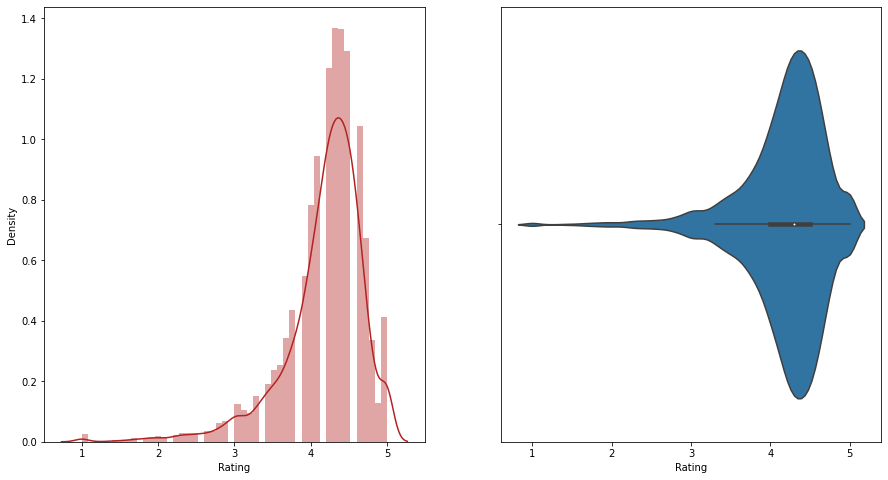

In [38]:
#try to understand the distribution of the data with distplot and violinplot
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df_ps['Rating'],color='firebrick',ax=ax[0])
sns.violinplot(x=df_ps['Rating'],data=df_ps, ax=ax[1])


From the above figure we can see that distribution is right skewed.So replace the null value with mean value will be inapropriate.we have to replace the null value with median or mode value.

In [39]:
median_value=df_ps[~df_ps['Rating'].isnull()].Rating.median()
median_count=df_ps[df_ps['Rating']==median_value].Rating.count()
print(f"The median value is {median_value} and it has appeard {median_count} times")

The median value is 4.3 and it has appeard 897 times


In [40]:
mode_value=df_ps['Rating'].mode()
mode_value

0    4.3
dtype: float64

So here median value and mode value is same,so we will replace the null values with median value

In [41]:
#replace the Nan value of Rating column with median value
df_ps.replace(to_replace='Nan',value=median_value,inplace=True)

###3.2 Reshaping the data

In [42]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


For the data analysis Reviews,Size,Price,Installs should be in numeric value.So we are going to convert them into numeric value.Last Updated column should be in datetime format 

### 3.2.1 Change the datatype of Review column

In [43]:
#changing the review datatype from object to integer
df_ps['Reviews']=df_ps['Reviews'].astype(int)
df_ps['Reviews'].dtype

dtype('int64')

### 3.2.2 Change the datatype of Size column

In [44]:
df_ps['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

Here M denontes the size in MB(MegaByte) and k denotes as kB(kiloByte).We need to stick to one unit.So we convert the data into numerical respect to MB unit

In [45]:
# create a function to convert the data into numerical and unit of MB
def size_convert(app_size):
  '''
  This is the function to convert the size into kb to mb
  '''
  try:
    if app_size[-1]=='M':
      return float(app_size[:-1])
    elif app_size[-1]=='k':
      return round((float(app_size[:-1])/1024),2)
    else:
      return float(app_size)
  except:
    return app_size

In [46]:
#now convert the column as suggested
df_ps['Size']=df_ps['Size'].apply(lambda size:size_convert(size))
df_ps['Size'].dtype

dtype('O')

In [47]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
len(df_ps[df_ps['Size']=='Varies with device'])

1227

There is 1227 no data is varies with device.But with this data,data analysis is quite impossible.so we have replace the data

<AxesSubplot:>

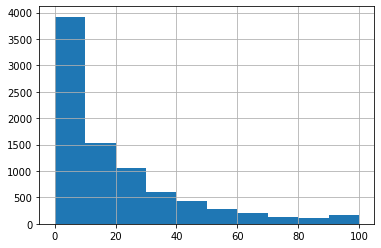

In [49]:
#try to understand the distribution of the data with distplot and violinplot
size_filter=df_ps[df_ps['Size']!='Varies with device']
size_filter['Size'].hist()


From the histogram plot we can see that distribution of size column is right skewed and it is highly spread.There is 1227 entries of varies with device.So any replacement will be inappropriate.So let it as it is.

### 3.2.3 Dealing with Installs columns
In  Install column there is '+' and ',' which need to be filtered than convert to numeric 

In [50]:
#create a function to convert install coumn to numeric data
def install_to_numeric(column_data):
  
  if '+'and ',' in column_data:
    data=int(column_data[:-1].replace(',',''))
    return data
  elif '+' in column_data:
    data=int(column_data[:-1])
    return data
  elif ',' in column_data:
    data=int(column_data.replace(',',''))
    return data
  else:
    return int(column_data)

In [51]:
#apply the function to convert install data into numeric
df_ps['Installs']=df_ps['Installs'].apply(lambda x:install_to_numeric(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###3.2.4 Dealing the Price Column
Price column need to convert in numerct data.There is '$' in the price data.we need to eliniminate it.

In [52]:
def price_to_numeric(price):
  '''
  This function is to convert price column datatype into numeric
  '''
  if '$' in price:
    new_price=float(price.replace('$',''))
    return new_price
  else:
    return float(price)

In [53]:
# apply the function into  price column
df_ps['Price']=df_ps['Price'].apply(lambda x:price_to_numeric(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 3.2.5 Dealing with Last Updated Column
Last Updated column need to be convert into datetime format

In [55]:
# Pandas to_datetime() function applied to the values in the last updated column
df_ps['Last Updated']=pd.to_datetime(df_ps['Last Updated'])
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [56]:
#once again look at the description of the dataset
df_ps.describe()

,Rating,Reviews,Installs,Price
count,8190.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.173321,2.168145e+05,7.785404e+06,1.100079
std,0.536691,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#### User Review Data load and Data preparation for Analysis

In [89]:
#load the user review dataset
ur_path='/content/drive/MyDrive/Alma Better/Python For Data Science/Capstone_Project/User Reviews.csv'
df_ur=pd.read_csv(ur_path)
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [90]:
#user review dataset information
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB



*   There are only 5 colums

*   2 columns are numrical and they are sentiment polarity and sentiment subjectivity

*   3 column are having categorical value and they are app.translated review,sentiment
*   There are lots of null value present in the  dataset.we need to inspect the dataset about this.



In [91]:
#description of the dataset
df_ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### User Review dataset information
user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [92]:
#columns of the data set
print(df_ur.columns)
rows=df_ur.shape[0]
cols=df_ur.shape[1]
print(f"The user review data set has {rows} rows and {cols} columns")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
The user review data set has 64295 rows and 5 columns


## Data Cleaning and Preparation


In [93]:
# Understand the missing data in details
missingdata_info(df_ur)


,datatypes,total no of value,not null value,null values,percentage of null value
Translated_Review,object,9649,37427,26868,41.788631
Sentiment,object,9649,37432,26863,41.780854
Sentiment_Polarity,float64,9649,37432,26863,41.780854
Sentiment_Subjectivity,float64,9649,37432,26863,41.780854




*   We can see that around 42 percent are missing value in all columns
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

In [94]:
#find out where all the column has null value
df_na=df_ur[df_ur['Translated_Review'].isna() & df_ur['Sentiment'].isna() & df_ur['Sentiment_Polarity'].isna() & df_ur['Sentiment_Subjectivity'].isna()]
df_na.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [95]:
print(len(df_na))

26863




*   26863 rows have all null valus.
*   This rows need to be dropped



In [96]:
#drop the rows which have all null value using isin function
cond = df_ur['Sentiment'].isin(df_na['Sentiment'])
df_ur.drop(df_ur[cond].index, inplace = True)


In [97]:
df_ur.shape

(37432, 5)

In [98]:
df_ur.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now only Translated Review has 5 null values

In [99]:
#check the rows which have null values of translated review
df_ur[df_ur['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [100]:
#check the unique values of translated review
df_ur['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                                                                                                                 247
Nice                                                                                                                                                                                                                                                                                                                 173
Great                                                                                                                                                                                                                                                                                                                131
Love                                                         

There seems to error the remaining non null values of Translated Reviews.This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

So we need to drop it too

In [103]:
#drop the null values
df_ur.dropna(inplace=True)
df_ur.shape

(37427, 5)

In [104]:
#check the unnique values of sentimate column
df_ur['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64



*   Only 3 categorical value is prenseted in sentiment column and they are Positive,Negative  and Neutral
*  Positive category has 23998 values
*   Negative category has 8271 values
*   Neutral category has 5158 values





### Merge the two Dataframe

In [106]:
#merge two dataframe by inner join
merged_df=pd.merge(df_ps,df_ur,on='App',how='inner')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Now we have total 3 dataframe for analysis


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###4.1 Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words our data has only one variable.It’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

#### Data Visualization of Category column

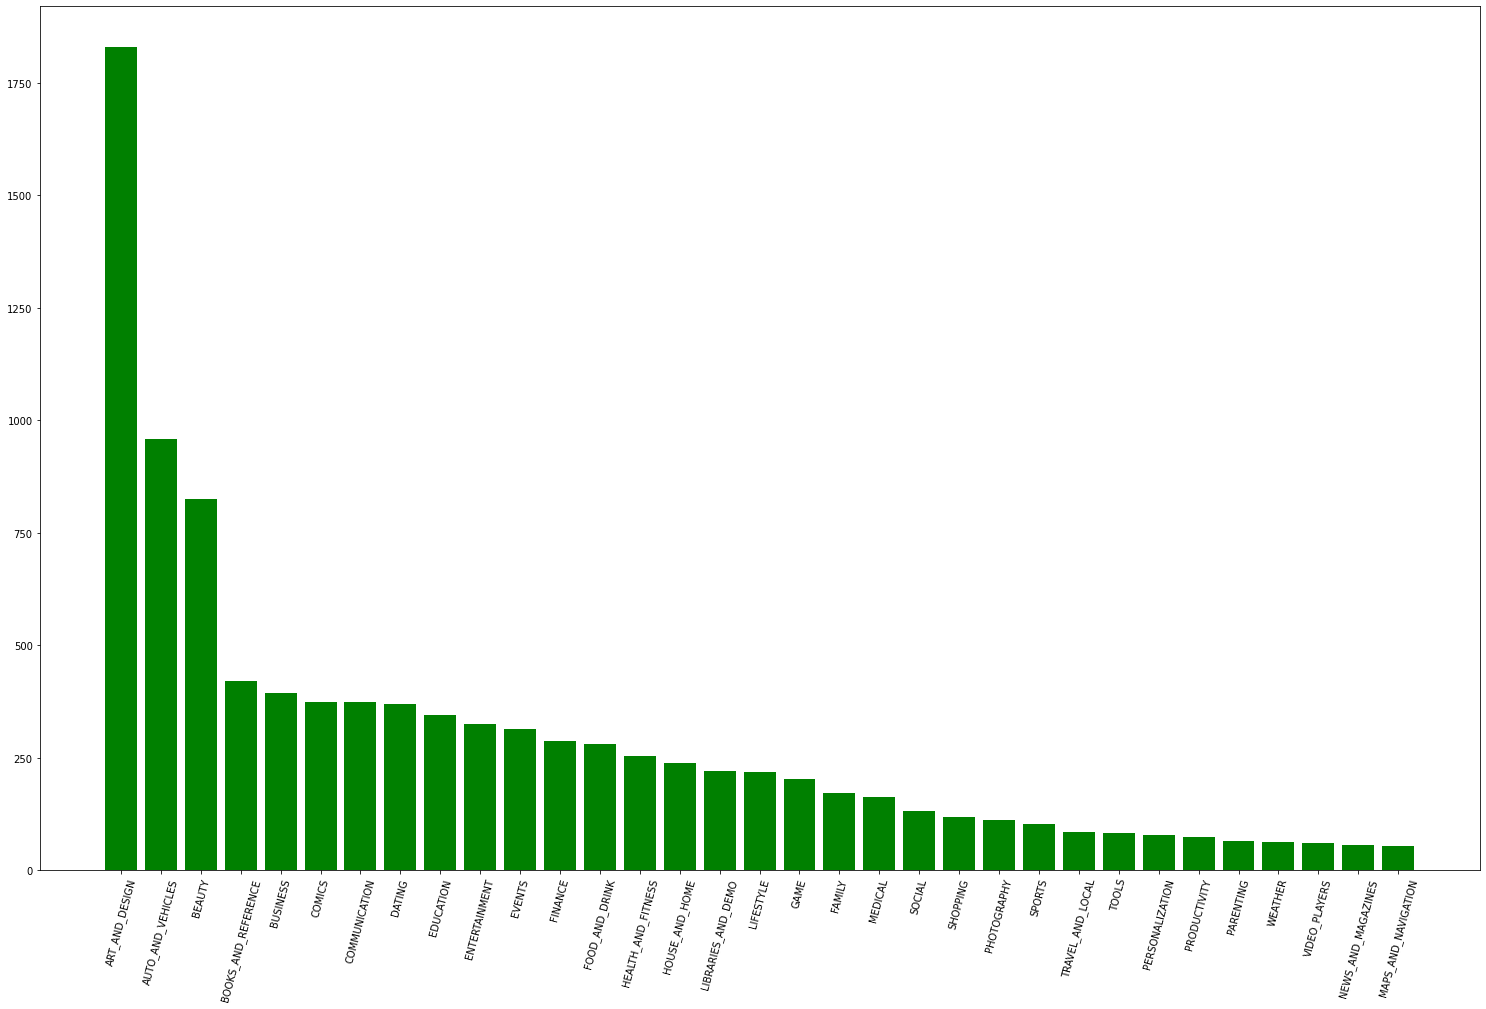

In [115]:
# Chart - 1 visualization code
fig=plt.figure(figsize=(20,12))
ax=fig.add_axes([0,0,1,1])
data=df_ps['Category'].value_counts()
label=df_ps['Category'].unique()
ax.bar(label,data, color='green')
plt.xticks(rotation=75)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***